In [78]:
import numpy as np
from matplotlib import pyplot as plt

In [92]:
L=1
Nx=251
D=10**(-6)
dt=8*D
t_final=50000*D
x_ax=np.linspace(0,L+L/(Nx-1),Nx+1)
dx=x_ax[1]-x_ax[0]
t_ax=np.arange(0,t_final+dt,dt)
errors=[0]

bcdl=1
bcdr=0
C0=0
grid=np.zeros((len(t_ax),len(x_ax)))
grid[:,0]=bcdl
s=dt/(dx**2)
print(dx,dt)
print(s)

0.004 8e-06
0.5


In [93]:
def analytic(x, t):
    result = 1
    for n in range(1001):
        result -= 2*(-1)**n/((n+0.5)*np.pi)*np.cos((n+0.5)*np.pi*(1-x))*np.exp(-(n+1/2)**2*np.pi*np.pi*t)
    return result

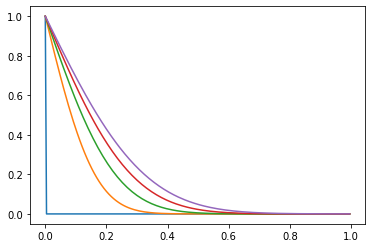

In [94]:
for t in range(len(t_ax)-1):
    for x in range(1,len(x_ax)-1):
        grid[t+1,x]=grid[t,x]+s*(grid[t,x-1]-2*grid[t,x]+grid[t,x+1])
        grid[t+1,-1]=grid[t+1,-3]
    errors.append(np.sum(np.abs(grid[t,0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt)))/(Nx-1))
    if(t%1000==0 and t<5000):
        plt.plot(x_ax[0:Nx-1],grid[t,0:Nx-1])

Text(0.5, 1.0, 'Δx=0.004; Δt=8e-06; s=0.5')

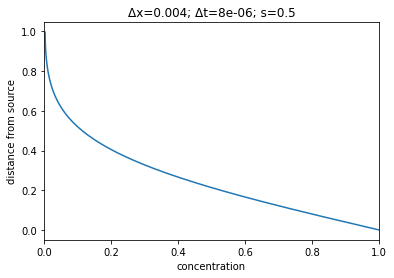

In [95]:
plt.plot(grid[-1,0:Nx-1],x_ax[0:Nx-1])
plt.xlabel('concentration')
plt.ylabel('distance from source')
plt.xlim(0,1)
plt.title('Δx={}; Δt={}; s={}'.format(dx,dt,s))

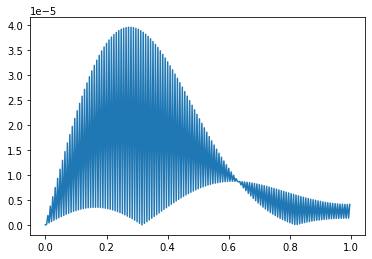

In [96]:
plt.plot(x_ax[0:Nx-1],np.abs(grid[-1,0:Nx-1]-analytic(x_ax[0:Nx-1],t_final)))

(-0.0001, 0.01)

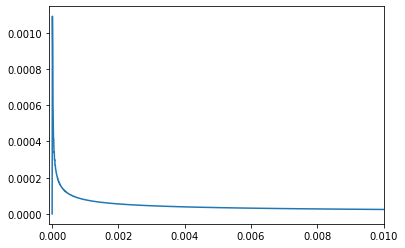

In [97]:
plt.plot(t_ax,errors)
plt.xlim(-0.0001,0.01)